In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate Data

In [17]:
mean_01 = np.array([0, 1])
mean_02 = np.array([3, 4])

cov_01 = np.array([[1.2, 0.2], [0.2, 0.8]])
cov_02 = np.array([[1.2, 0.5], [0.5, 1.8]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

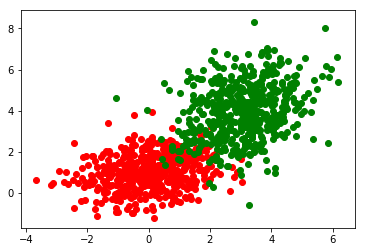

In [18]:
plt.figure()
plt.scatter(dist_01[:, 0], dist_01[:, 1], color='red')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='green')
plt.show()

In [33]:
dataset = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1] + 1))
dataset[:dist_01.shape[0], :-1] = dist_01
dataset[dist_01.shape[0]:, :-1] = dist_02
dataset[dist_01.shape[0]:, -1] = 1
print(dataset.shape)

(1000, 3)


In [34]:
print(dataset[:10])
np.random.shuffle(dataset)
print('------- After Shuffling ------')

print(dataset[:10])

[[ 0.41354493  0.97143863  0.        ]
 [ 0.10656136  1.08635422  0.        ]
 [ 0.09224903  2.35425197  0.        ]
 [-0.79919855  1.38721897  0.        ]
 [-0.0490523   1.08080293  0.        ]
 [ 0.43976498  2.3943351   0.        ]
 [ 1.80211476  0.9020232   0.        ]
 [ 0.7334382  -0.54530428  0.        ]
 [ 0.4189095   0.2771789   0.        ]
 [-2.04178402  1.80274101  0.        ]]
------- After Shuffling ------
[[ 0.20915616 -0.10753298  0.        ]
 [ 3.8731893   1.07220337  1.        ]
 [ 0.76274522  1.81702486  0.        ]
 [ 1.62258289  4.50415327  1.        ]
 [-0.65807579  0.01730113  0.        ]
 [-1.34139216  1.59856283  0.        ]
 [ 3.49769661  3.91537158  1.        ]
 [ 0.49195364  1.45317     0.        ]
 [ 4.10935376  3.25047424  1.        ]
 [-0.99159803 -0.90014965  0.        ]]


In [25]:
split = int(0.8 * dataset.shape[0])
X_train, X_test, y_train, y_test = dataset[:split, :-1], dataset[split:, :-1], dataset[:split, -1], dataset[split:, -1]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


In [35]:
# np.hstack((X_train[:10], y_train[:10].reshape(-1, 1)))

# Implement Logistic Regression (Classifier)

In [154]:
class LogisticRegression:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.N, self.dim = X.shape[0], X.shape[1]
        self.coef = np.random.uniform(low=-1, high=1, size=(self.dim, ))
        self.intercept = np.random.random()
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def hypothesis(self, x):
        return self.sigmoid(self.coef.dot(x) + self.intercept)
    
    def apply_gradient_descent(self, learning_rate=0.1):
        
        gradients = np.zeros_like(self.coef)
        grad_00 = 0
        
        # For all examples calculate gradient
        for i in range(self.N):
            xi = self.X[i]
            gradients += (self.hypothesis(xi) - self.y[i]) * xi
            grad_00 += (self.hypothesis(xi) - self.y[i])
        
        # Update Weights
        self.coef -= learning_rate * gradients
        self.intercept -= learning_rate * grad_00
    
    
    def compute_loss(self):
        log_likelihood = 0
        # L = ylog(hx) + (1-y)(log(1 - hx))
        for x,y in zip(self.X, self.y):
            log_likelihood += ( (y * np.log(self.hypothesis(x) + 1e-03)) +  ((1 - y) * np.log(1 - self.hypothesis(x) + 1e-03)) )
        
        neg_log_likelihood = -log_likelihood / self.N
        return neg_log_likelihood
    
    def predict(self, x):
        hx = self.hypothesis(x)
        if hx >= 0.5:
            return 1
        else:
            return 0
        
    def get_predictions(self, X_data):
        yhat = []
        for x in X_data:
            yhat.append(self.predict(x))
        return np.array(yhat)        
    
    def accuracy(self, test_data, y_actual):
        yhat = self.get_predictions(test_data)
        return (yhat == y_actual).sum() / test_data.shape[0]
        
        
        

In [155]:
log_reg = LogisticRegression(X_train, y_train)
losses = [log_reg.compute_loss()]

In [161]:
def draw_decision_boundary():
    plt.figure()
    plt.scatter(dist_01[:, 0], dist_01[:, 1], color='red')
    plt.scatter(dist_02[:, 0], dist_02[:, 1], color='green')
    x = np.array([-4, 5])
    y = -(log_reg.coef[0] * x + log_reg.intercept)/log_reg.coef[1]
    plt.plot(x,y, 'k')
    plt.title("Decision Boundary")
    plt.show()

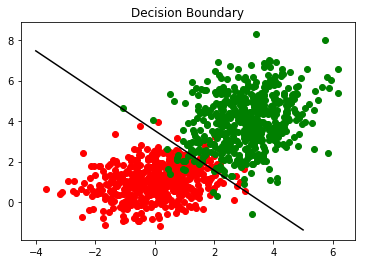

Accuracy: 0.97


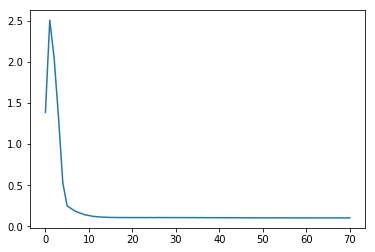

In [162]:
epochs = 14
alpha = 0.01
for _ in range(epochs):
    log_reg.apply_gradient_descent(alpha)
    losses.append(log_reg.compute_loss())
draw_decision_boundary()
print("Accuracy:", log_reg.accuracy(X_test, y_test))
plt.figure()
plt.plot(losses)
plt.show()

# Using SKLearn

In [142]:
from sklearn.linear_model import LogisticRegression as SKLogReg

In [143]:
sk_log_reg = SKLogReg()

In [144]:
sk_log_reg.fit(X_train, y_train)

/Users/Pratulya/Desktop/codingblocks/ml-dwarka/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [146]:
sk_log_reg.score(X_test, y_test)

0.97

In [147]:
sk_log_reg.coef_

array([[1.66422737, 1.53228089]])